| **Distribution**       | **Range of Values**         | **Parameters**              | **Mean**                                | **Variance**                               |
|-------------------------|-----------------------------|-----------------------------|-----------------------------------------|--------------------------------------------|
| **Bernoulli**           | $x \in \{0, 1\}$           | $p$                         | $p$                                     | $p(1 - p)$                                 |
| **Poisson**             | $x \in \{0, 1, 2, \dots\}$ | $\lambda$                   | $\lambda$                               | $\lambda$                                  |
| **Normal**              | $x \in (-\infty, \infty)$  | $\mu, \sigma$               | $\mu$                                   | $\sigma^2$                                 |
| **Exponential**         | $x \in [0, \infty)$        | $\lambda$                   | $\frac{1}{\lambda}$                     | $\frac{1}{\lambda^2}$                     |
| **Beta**                | $x \in [0, 1]$            | $\alpha, \beta$             | $\frac{\alpha}{\alpha + \beta}$         | $\frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$ |
| **Pareto**              | $x \in [x_m, \infty)$      | $\alpha$                    | $\frac{\alpha x_m}{\alpha - 1}$ (if $\alpha > 1$) | $\frac{\alpha x_m^2}{(\alpha - 1)^2 (\alpha - 2)}$ (if $\alpha > 2$) |
| **T-Distribution**      | $x \in (-\infty, \infty)$  | $\nu$ (df)                  | $0$                                     | $\frac{\nu}{\nu - 2}$ (if $\nu > 2$)       |
| **Chi-Squared**         | $x \in [0, \infty)$        | $\nu$ (df)                  | $\nu$                                   | $2\nu$                                     |
| **Uniform**             | $x \in [a, b]$            | $a, b$                      | $\frac{a + b}{2}$                       | $\frac{(b - a)^2}{12}$                    |

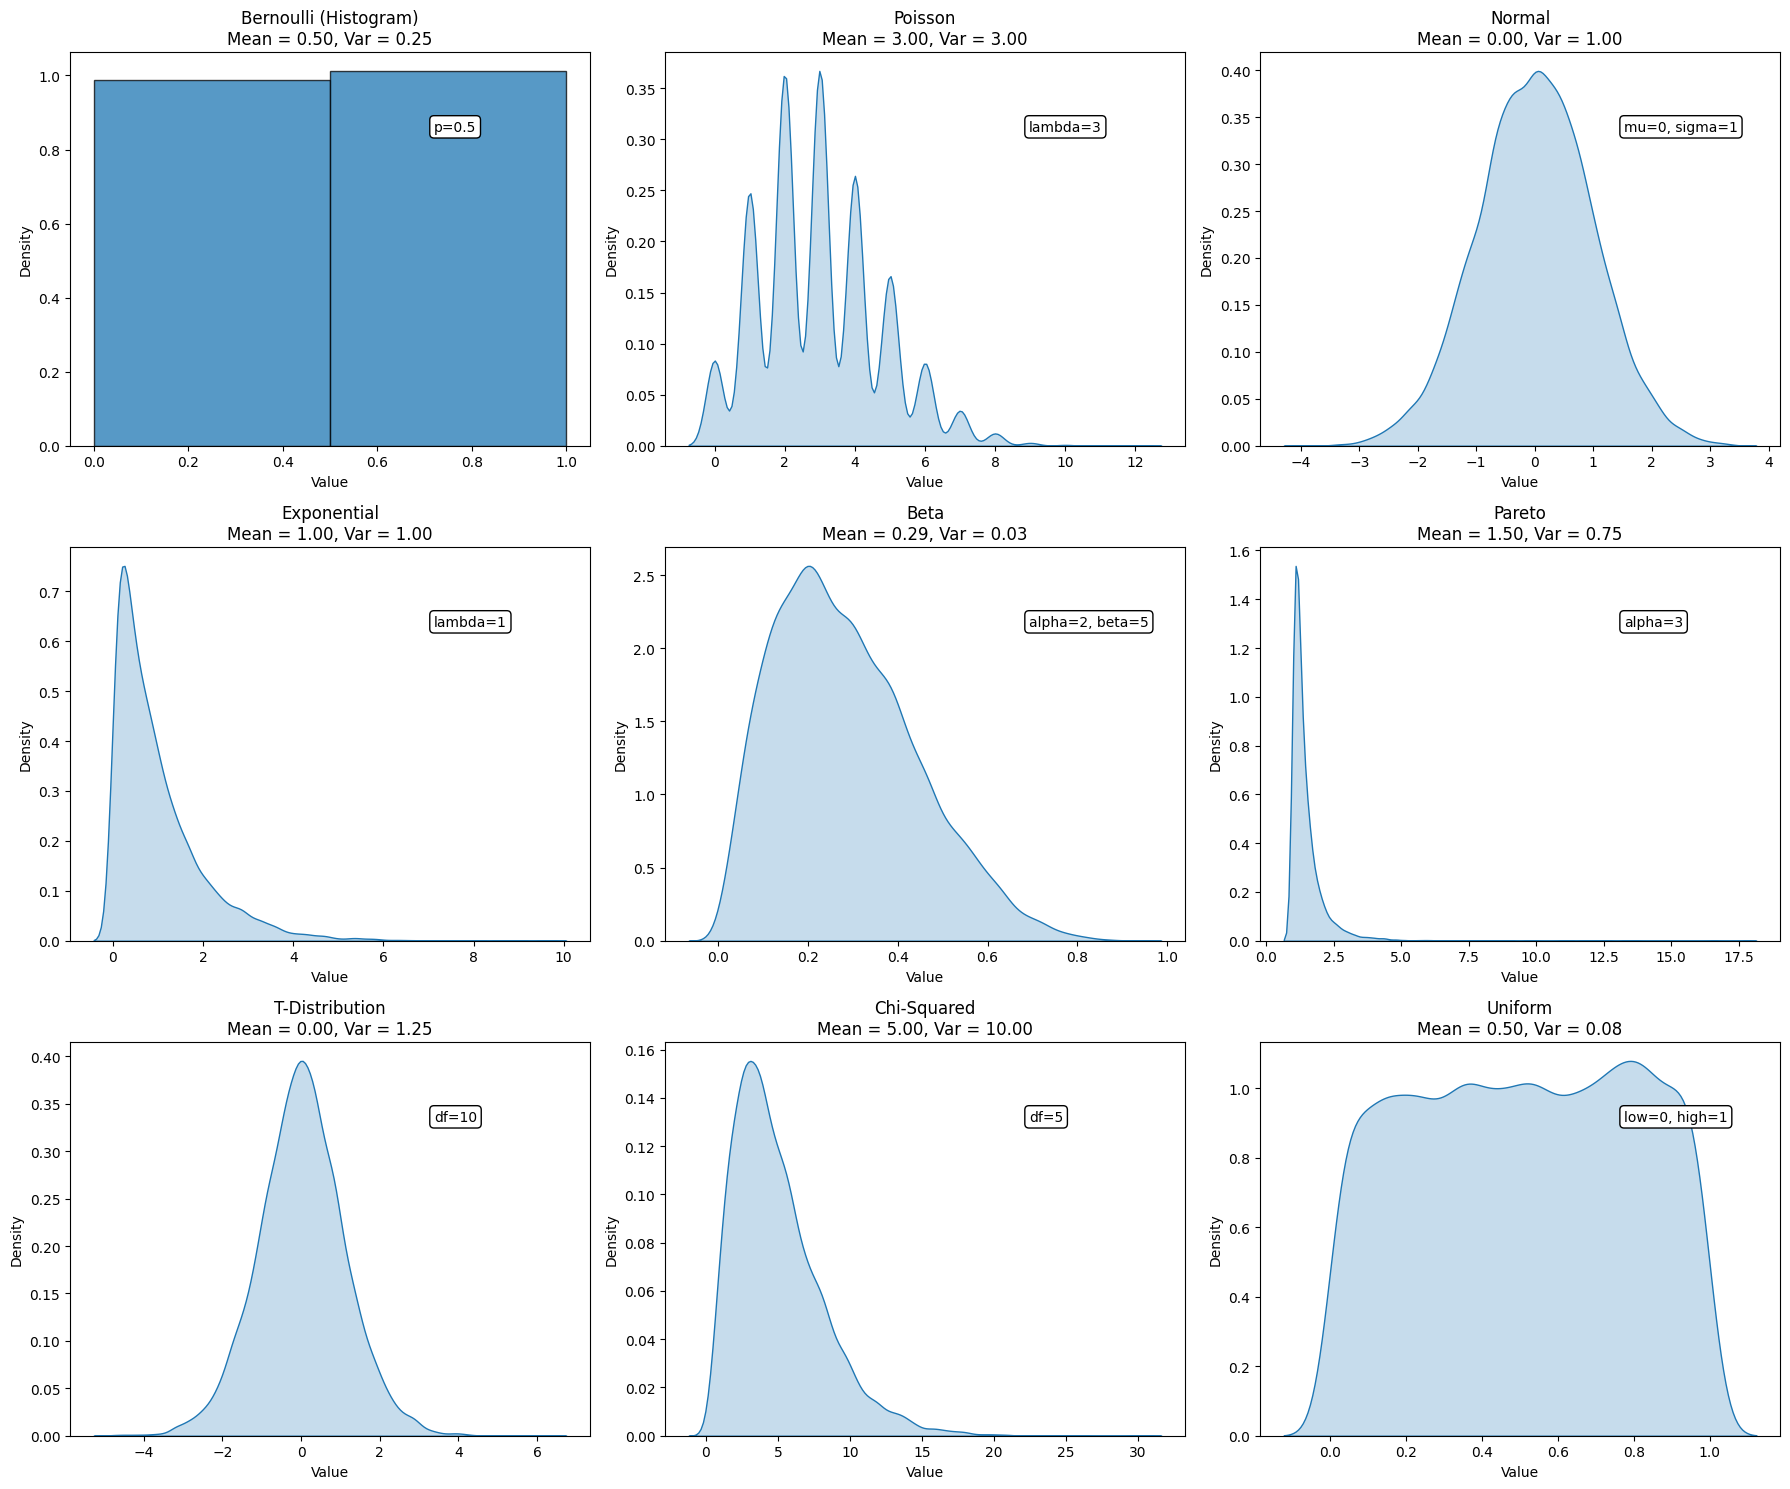

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters for distributions and number of samples
n_samples = 10000

# Sampling from distributions
data_bernoulli = np.random.binomial(1, 0.5, n_samples)
data_poisson = np.random.poisson(3, n_samples)
data_normal = np.random.normal(0, 1, n_samples)
data_exponential = np.random.exponential(1, n_samples)
data_beta = np.random.beta(2, 5, n_samples)
data_pareto = (np.random.pareto(3, n_samples) + 1)  # Shifted to avoid 0 values
data_t = np.random.standard_t(df=10, size=n_samples)  # t-distribution with df=10
data_chi_sq = np.random.chisquare(df=5, size=n_samples)  # Chi-squared distribution with df=5
data_uniform = np.random.uniform(0, 1, n_samples)  # Uniform distribution between 0 and 1

# Prepare the data for plotting
distributions = {
    "Bernoulli (Histogram)": {
        "data": data_bernoulli,
        "params": {"p": 0.5},
        "mean": 0.5,
        "variance": 0.25
    },
    "Poisson": {
        "data": data_poisson,
        "params": {"lambda": 3},
        "mean": 3,
        "variance": 3
    },
    "Normal": {
        "data": data_normal,
        "params": {"mu": 0, "sigma": 1},
        "mean": 0,
        "variance": 1
    },
    "Exponential": {
        "data": data_exponential,
        "params": {"lambda": 1},
        "mean": 1,
        "variance": 1
    },
    "Beta": {
        "data": data_beta,
        "params": {"alpha": 2, "beta": 5},
        "mean": 2 / (2 + 5),
        "variance": (2 * 5) / ((2 + 5)**2 * (2 + 5 + 1))
    },
    "Pareto": {
        "data": data_pareto,
        "params": {"alpha": 3},
        "mean": 3 / 2,  # For alpha > 2, mean exists
        "variance": 3 / 4  # For alpha > 4, variance exists
    },
    "T-Distribution": {
        "data": data_t,
        "params": {"df": 10},
        "mean": 0,  # Mean of t-distribution
        "variance": 10 / (10 - 2) if 10 > 2 else np.inf  # Variance of t-distribution
    },
    "Chi-Squared": {
        "data": data_chi_sq,
        "params": {"df": 5},
        "mean": 5,
        "variance": 10  # df = 5, variance = 2*df
    },
    "Uniform": {
        "data": data_uniform,
        "params": {"low": 0, "high": 1},
        "mean": (0 + 1) / 2,
        "variance": (1 - 0)**2 / 12
    }
}

# Create a 3x3 grid of subplots (now we have 9 plots)
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# Flatten axes array for easier indexing
axes = axes.flatten()

# Loop through the distributions and plot on the respective subplot
for i, (name, dist_info) in enumerate(distributions.items()):
    ax = axes[i]
    data = dist_info["data"]
    params = dist_info["params"]
    mean = dist_info["mean"]
    variance = dist_info["variance"]
    
    # Plot the distribution
    if "Bernoulli" in name:
        ax.hist(data, bins=2, density=True, alpha=0.75, edgecolor="k")
    else:
        sns.kdeplot(data, fill=True, bw_adjust=0.9, ax=ax)
    
    # Set title and labels
    ax.set_title(f"{name}\nMean = {mean:.2f}, Var = {variance:.2f}")
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    
    # Annotate the parameters
    param_text = ", ".join([f"{key}={value}" for key, value in params.items()])
    ax.annotate(param_text, xy=(0.7, 0.8), xycoords="axes fraction", fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1))

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the grid of plots
plt.show()


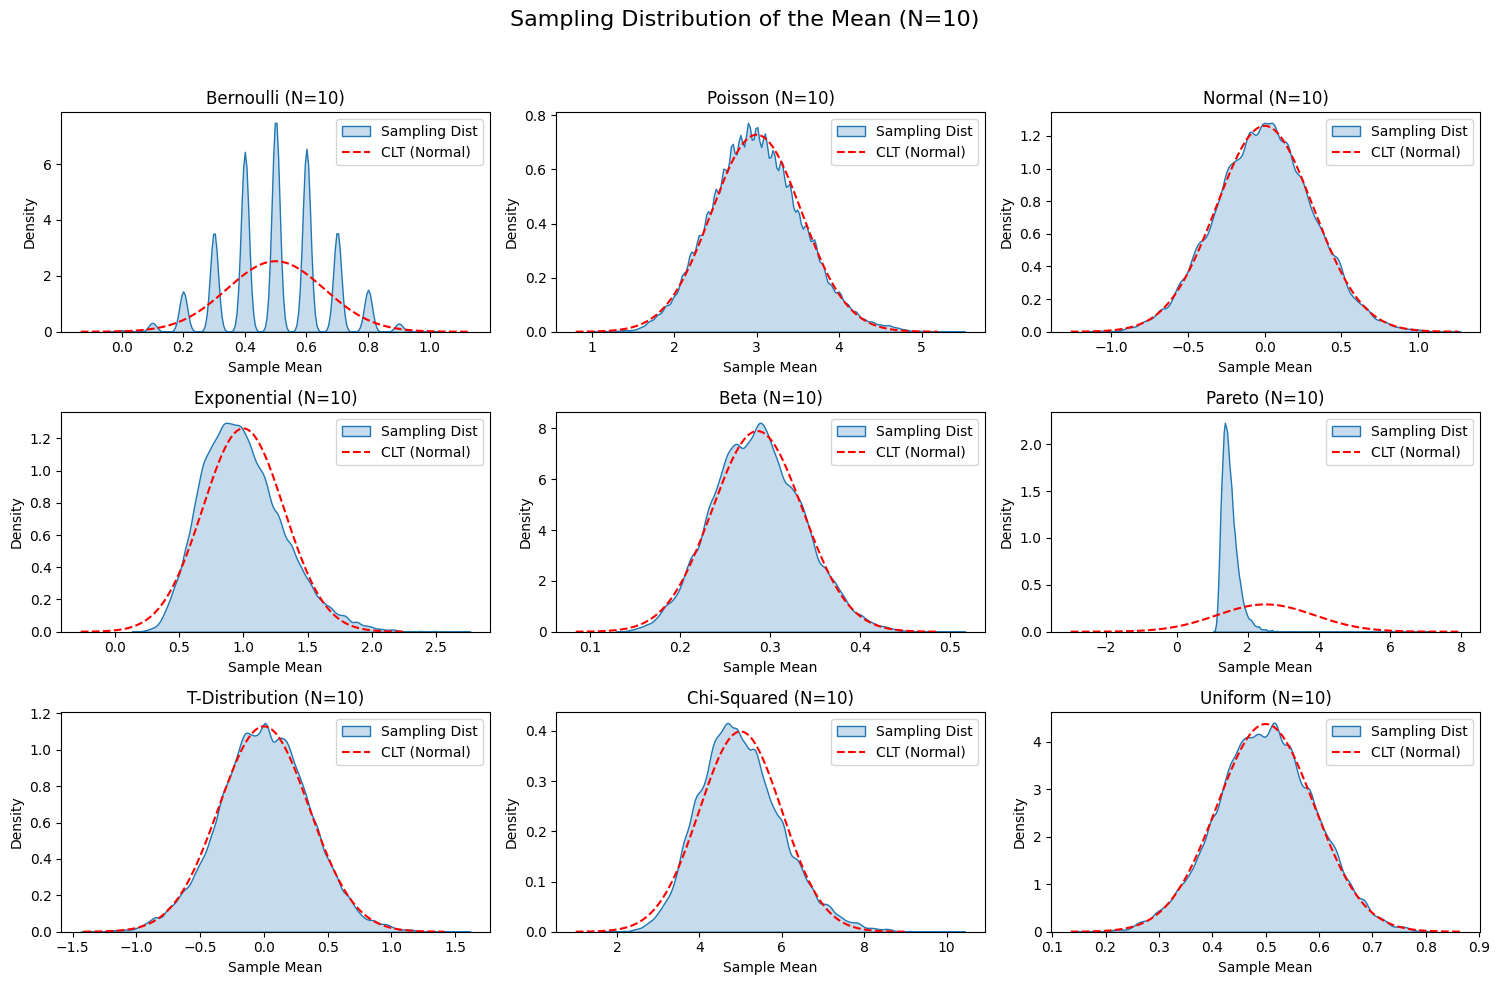

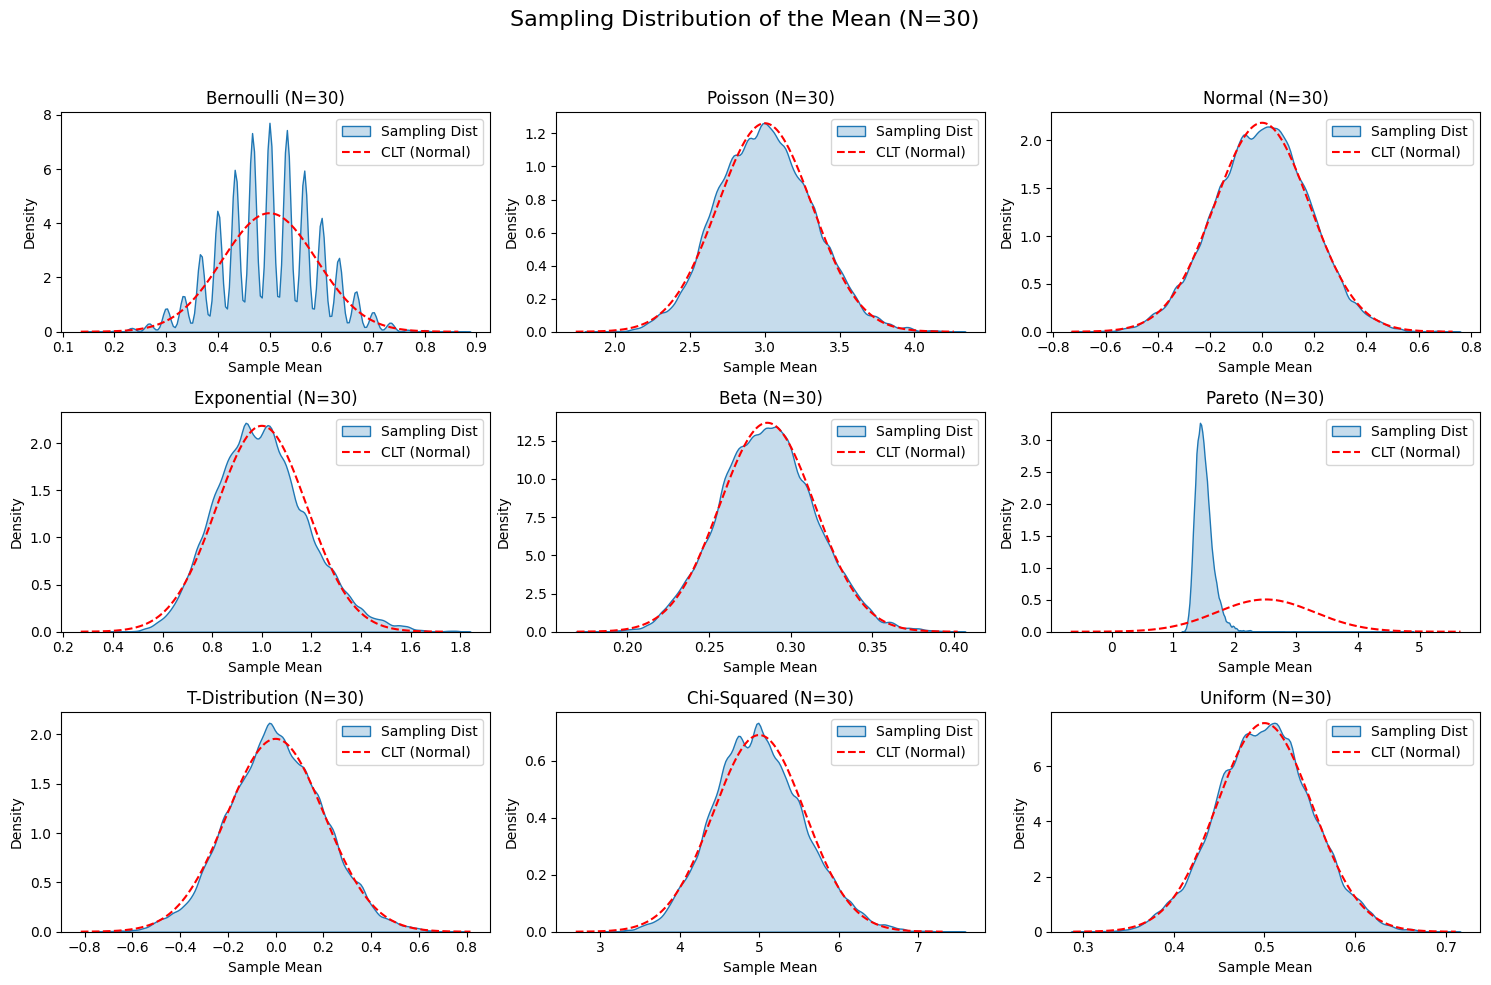

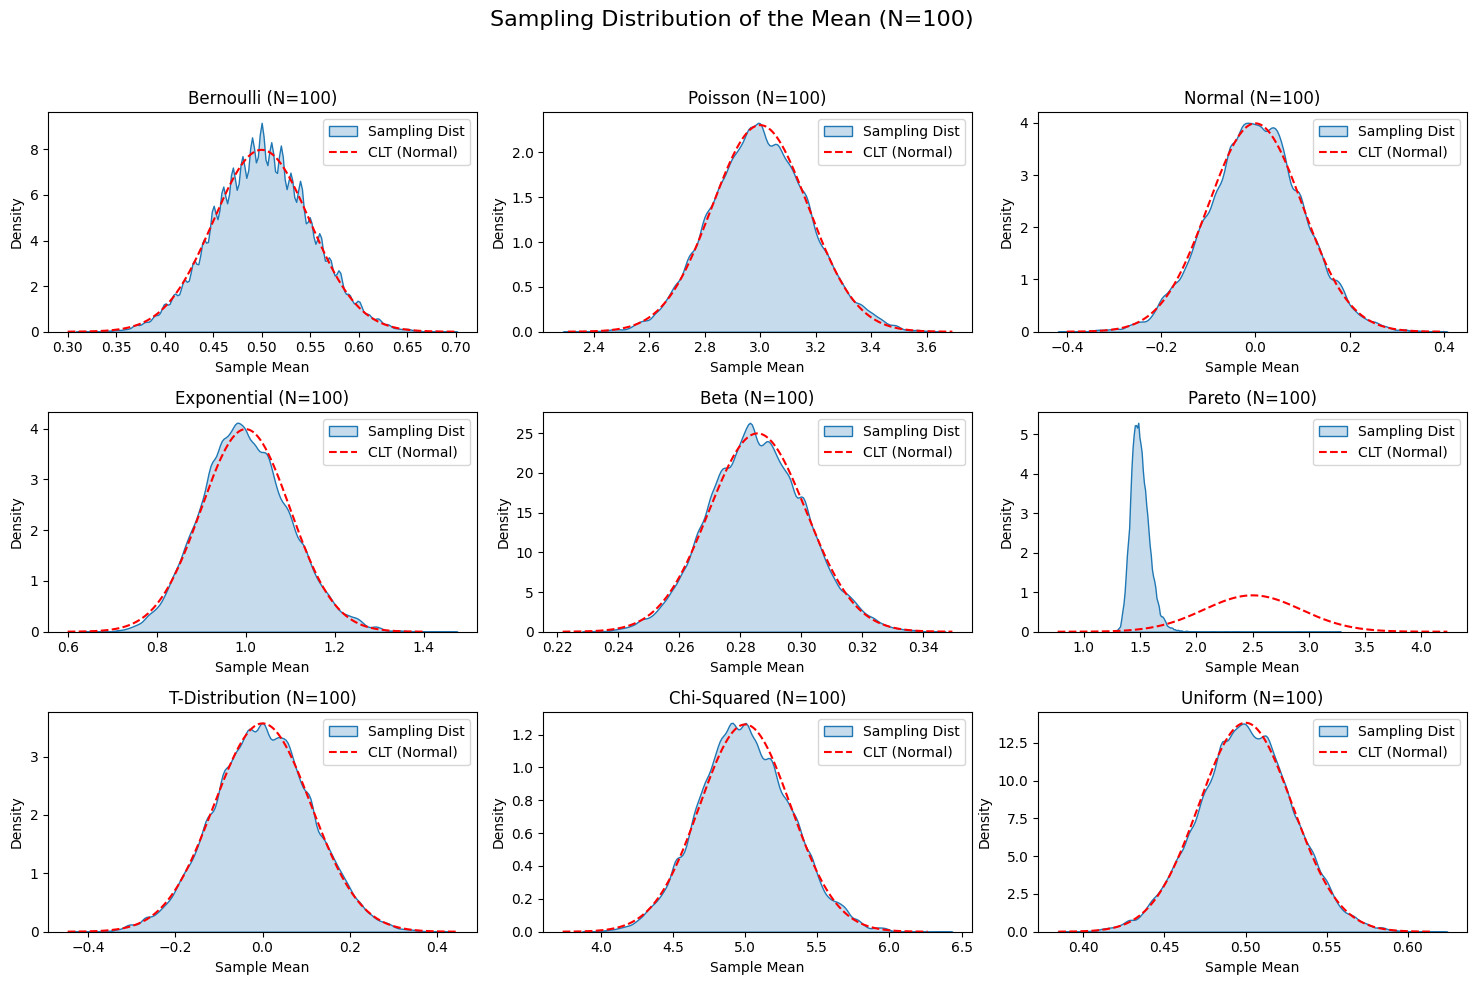

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Parameters for distributions
n_samples = 10000

# Define the distributions as callables
distributions = {
    "Bernoulli": lambda size: np.random.binomial(1, 0.5, size),
    "Poisson": lambda size: np.random.poisson(3, size),
    "Normal": lambda size: np.random.normal(0, 1, size),
    "Exponential": lambda size: np.random.exponential(1, size),
    "Beta": lambda size: np.random.beta(2, 5, size),
    "Pareto": lambda size: np.random.pareto(3, size) + 1,
    "T-Distribution": lambda size: np.random.standard_t(df=10, size=size),
    "Chi-Squared": lambda size: np.random.chisquare(df=5, size=size),
    "Uniform": lambda size: np.random.uniform(0, 1, size)
}

# True means and variances for each distribution
true_mean = {
    "Bernoulli": 0.5,
    "Poisson": 3,
    "Normal": 0,
    "Exponential": 1,
    "Beta": 2 / (2 + 5),
    "Pareto": 3 / 2 + 1,
    "T-Distribution": 0,
    "Chi-Squared": 5,
    "Uniform": 0.5
}

true_variance = {
    "Bernoulli": 0.25,
    "Poisson": 3,
    "Normal": 1,
    "Exponential": 1,
    "Beta": (2 * 5) / ((2 + 5)**2 * (2 + 5 + 1)),
    "Pareto": (3 * ((3 / 2 + 1)**2)) / (3 - 2),
    "T-Distribution": 10 / (10 - 2),
    "Chi-Squared": 10,
    "Uniform": 1 / 12
}

# Monte Carlo simulation function
def mc_simulation(func, sample_size, n_samples):
    return [np.mean(func(size=sample_size)) for _ in range(n_samples)]

# Function to plot sampling distributions with CLT bounds
def plot_sampling_distributions_with_clt(sample_means_dict, n, title, true_mean, true_variance):
    plt.figure(figsize=(15, 10))
    for i, (name, sample_means) in enumerate(sample_means_dict.items(), 1):
        plt.subplot(3, 3, i)
        
        # Plot KDE
        sns.kdeplot(sample_means, fill=True, bw_adjust=0.5, label="Sampling Dist")
        
        # CLT bounds
        clt_mean = true_mean[name]
        clt_std = np.sqrt(true_variance[name] / n)
        x = np.linspace(clt_mean - 4 * clt_std, clt_mean + 4 * clt_std, 1000)
        y = stats.norm.pdf(x, clt_mean, clt_std)
        plt.plot(x, y, linestyle="--", label="CLT (Normal)", color="red")
        
        plt.title(f"{name} (N={n})")
        plt.xlabel("Sample Mean")
        plt.ylabel("Density")
        plt.legend()
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Run simulations and plot with CLT bounds for sample sizes
for N in [10, 30, 100]:
    sample_means_dict = {name: mc_simulation(func, N, n_samples) for name, func in distributions.items()}
    plot_sampling_distributions_with_clt(sample_means_dict, N, f"Sampling Distribution of the Mean (N={N})", true_mean, true_variance)


### Berry Esseen Bounds on Convergence Rates

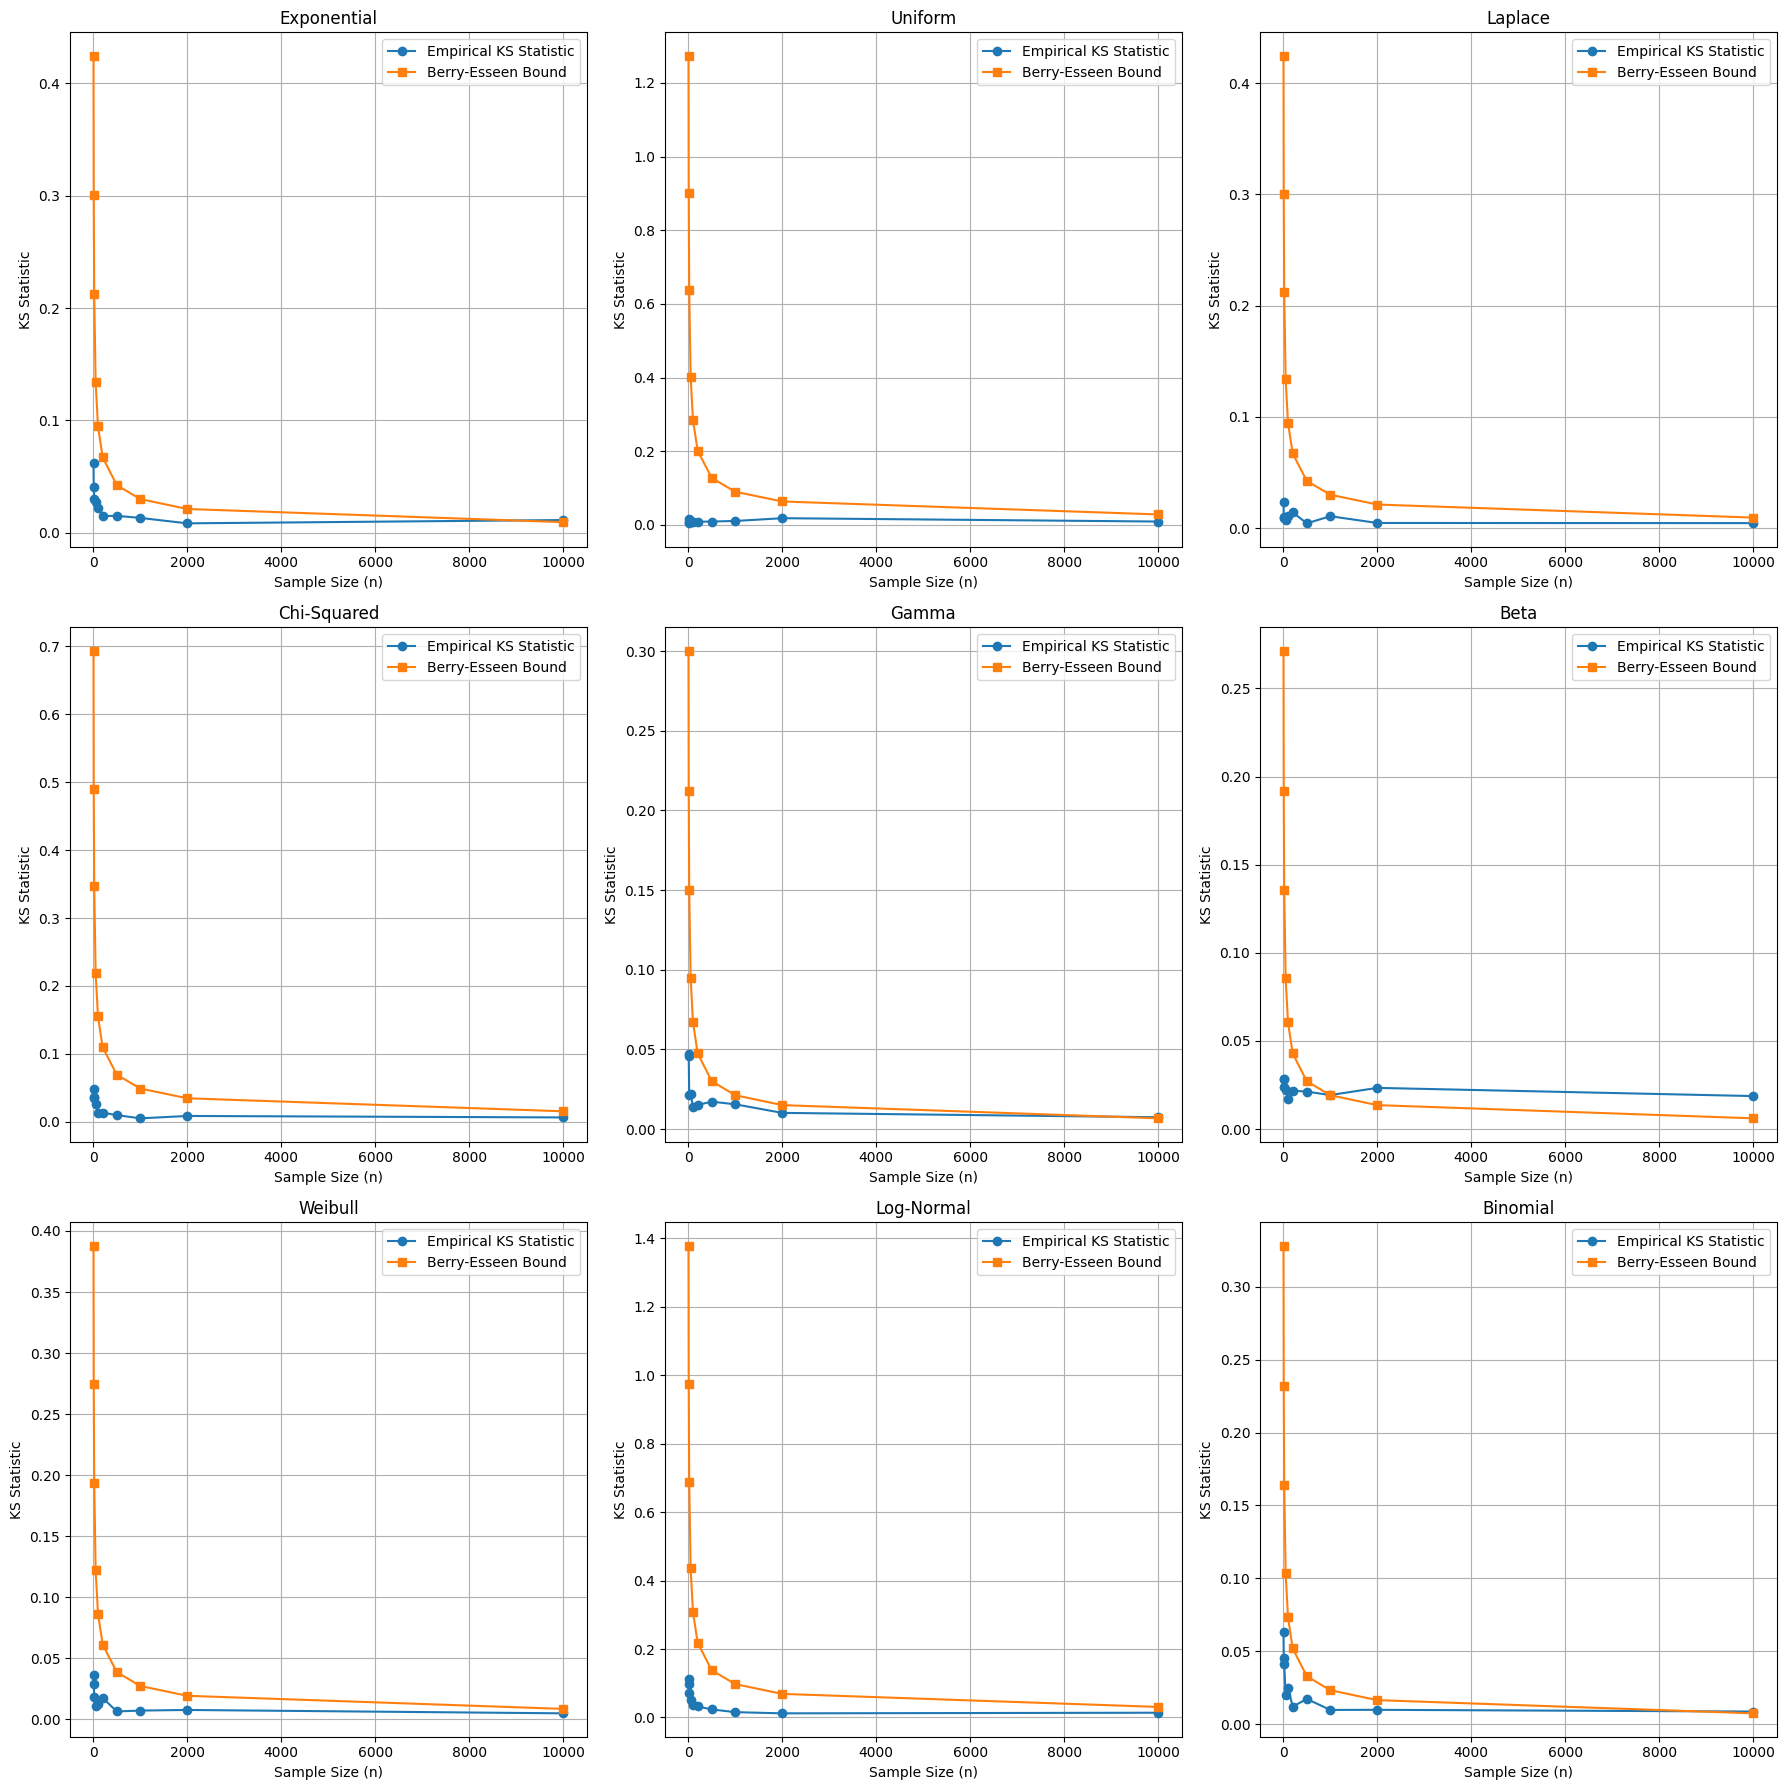

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import (
    expon, uniform, laplace, chi2, gamma, beta, weibull_min,
    lognorm, binom, norm, kstest
)
from scipy.special import gamma as gamma_func

# Define distributions and their parameters
distributions = [
    {
        'name': 'Exponential(λ=1)',
        'rv': expon(scale=1),
        'mu': 1,
        'sigma': 1,
        'rho': 2,
        'label': 'Exponential'
    },
    {
        'name': 'Uniform(a=0, b=1)',
        'rv': uniform(loc=0, scale=1),
        'mu': 0.5,
        'sigma': np.sqrt(1 / 12),
        'rho': (1 / 4) / np.sqrt(3),
        'label': 'Uniform'
    },
    {
        'name': 'Laplace(μ=0, b=1/√2)',
        'rv': laplace(loc=0, scale=1 / np.sqrt(2)),
        'mu': 0,
        'sigma': 1,
        'rho': 2,
        'label': 'Laplace'
    },
    {
        'name': 'Chi-Squared(k=3)',
        'rv': chi2(df=3),
        'mu': 3,
        'sigma': np.sqrt(6),
        'rho': 48,  # Calculated as μ3 = 48
        'label': 'Chi-Squared'
    },
    {
        'name': 'Gamma(k=2, θ=1)',
        'rv': gamma(a=2, scale=1),
        'mu': 2,
        'sigma': np.sqrt(2),
        'rho': 4,  # μ3 = 4
        'label': 'Gamma'
    },
    {
        'name': 'Beta(α=2, β=5)',
        'rv': beta(a=2, b=5),
        'mu': 2 / 7,
        'sigma': np.sqrt(10 / 343),
        'rho': None,  # Will compute numerically
        'label': 'Beta'
    },
    {
        'name': 'Weibull(k=1.5, λ=1)',
        'rv': weibull_min(c=1.5, scale=1),
        'mu': gamma_func(1 + 1 / 1.5),
        'sigma': np.sqrt(gamma_func(1 + 2 / 1.5) - (gamma_func(1 + 1 / 1.5))**2),
        'rho': None,  # Will compute numerically
        'label': 'Weibull'
    },
    {
        'name': 'Log-Normal(μ=0, σ=1)',
        'rv': lognorm(s=1, scale=np.exp(0)),
        'mu': np.exp(0.5),
        'sigma': np.sqrt((np.exp(1) - 1) * np.exp(1)),
        'rho': None,  # Will compute numerically
        'label': 'Log-Normal'
    },
    {
        'name': 'Binomial(n=10, p=0.5)',
        'rv': binom(n=10, p=0.5),
        'mu': 5,
        'sigma': np.sqrt(2.5),
        'rho': None,  # Will compute numerically
        'label': 'Binomial'
    }
]

C = 0.4748  # Berry-Esseen constant
simulations = 10000
sample_sizes = [5, 10, 20, 50, 100, 200, 500, 1000, 2000, 10000]

# Initialize the plot grid
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.flatten()

for idx, dist in enumerate(distributions):
    ks_stats = []
    berry_esseen_bounds = []
    
    mu = dist['mu']
    sigma = dist['sigma']
    
    # Compute third absolute central moment if not provided
    if dist['rho'] is None:
        # Numerically compute the third absolute central moment
        sample = dist['rv'].rvs(size=100000)
        rho = np.mean(np.abs(sample - mu)**3)
    else:
        rho = dist['rho']
    
    for n in sample_sizes:
        # Simulate sample means
        sample_means = np.mean(
            dist['rv'].rvs(size=(simulations, n)),
            axis=1
        )
        
        # Standardize sample means
        standardized_sample_means = (sample_means - mu) / (sigma / np.sqrt(n))
        
        # KS test
        d_value, _ = kstest(standardized_sample_means, 'norm', args=(0, 1))
        ks_stats.append(d_value)
        
        # Berry-Esseen bound
        bound = (C * rho) / (sigma**3 * np.sqrt(n))
        berry_esseen_bounds.append(bound)
    
    # Plot KS statistic vs. sample size
    ax = axes[idx]
    ax.plot(sample_sizes, ks_stats, 'o-', label=r'Empirical KS Statistic')
    ax.plot(sample_sizes, berry_esseen_bounds, 's-', label='Berry-Esseen Bound')
    ax.set_title(dist['label'])
    ax.set_xlabel('Sample Size (n)')
    ax.set_ylabel('KS Statistic')
    ax.legend()
    ax.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


0
1
2
3
4
5
6
7
8


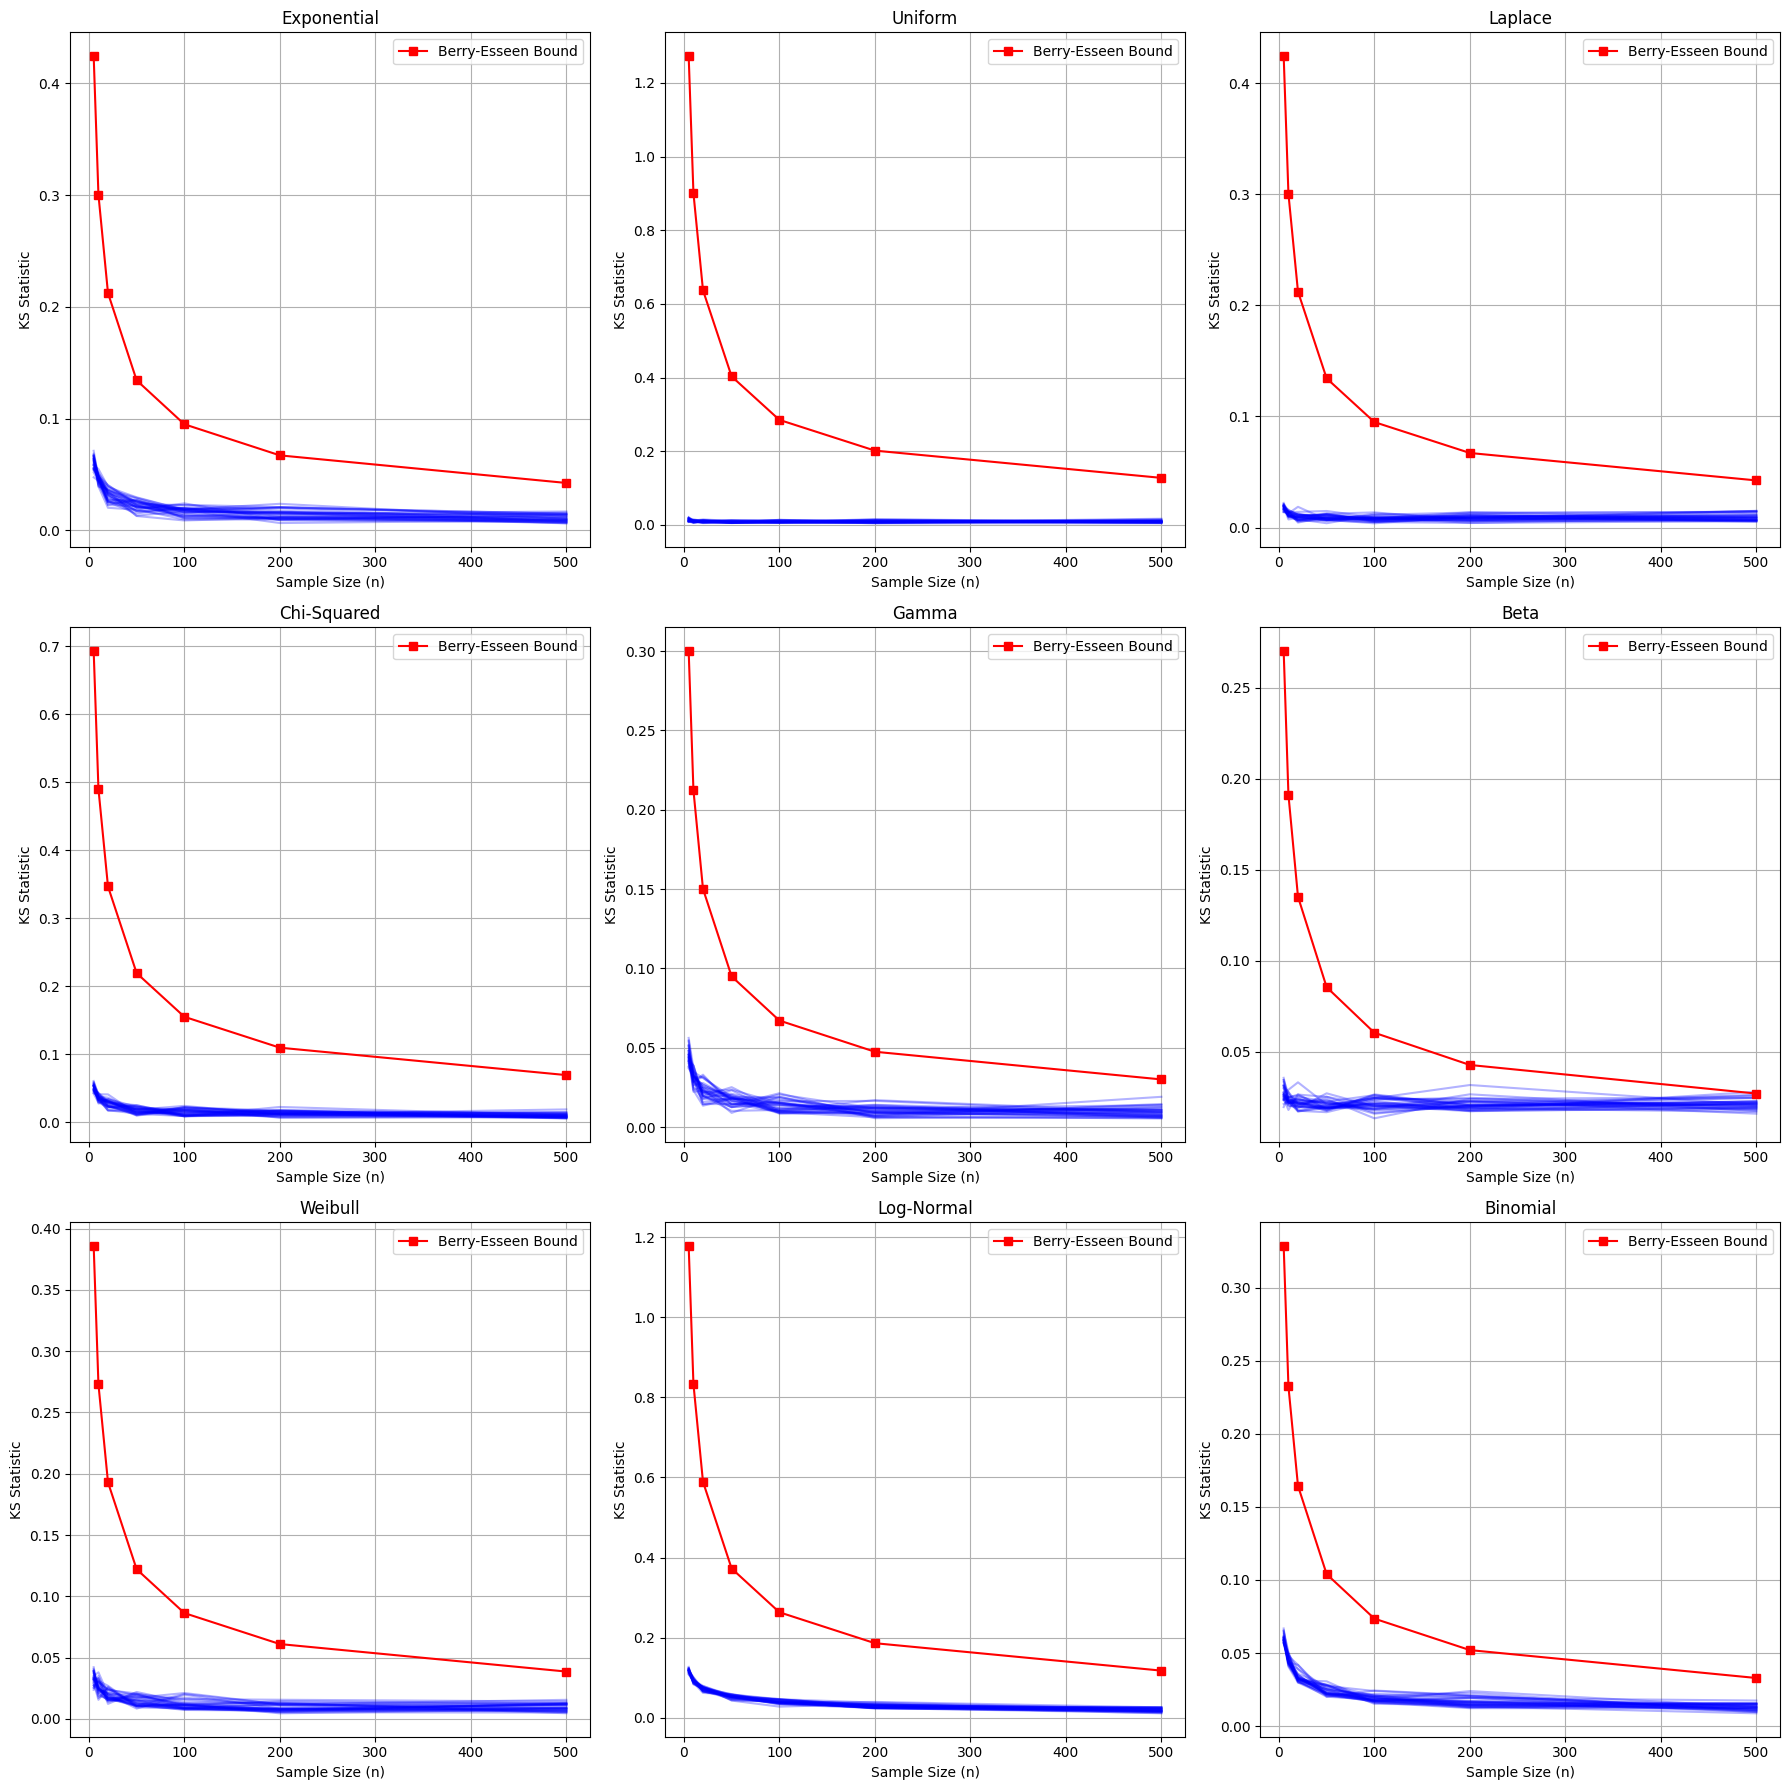

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import (
    expon, uniform, laplace, chi2, gamma, beta, weibull_min,
    lognorm, binom, norm, kstest
)
from scipy.special import gamma as gamma_func

# Define distributions and their parameters
distributions = [
    {
        'name': 'Exponential(λ=1)',
        'rv': expon(scale=1),
        'mu': 1,
        'sigma': 1,
        'rho': 2,
        'label': 'Exponential'
    },
    {
        'name': 'Uniform(a=0, b=1)',
        'rv': uniform(loc=0, scale=1),
        'mu': 0.5,
        'sigma': np.sqrt(1 / 12),
        'rho': (1 / 4) / np.sqrt(3),
        'label': 'Uniform'
    },
    {
        'name': 'Laplace(μ=0, b=1/√2)',
        'rv': laplace(loc=0, scale=1 / np.sqrt(2)),
        'mu': 0,
        'sigma': 1,
        'rho': 2,
        'label': 'Laplace'
    },
    {
        'name': 'Chi-Squared(k=3)',
        'rv': chi2(df=3),
        'mu': 3,
        'sigma': np.sqrt(6),
        'rho': 48,  # Calculated as μ3 = 48
        'label': 'Chi-Squared'
    },
    {
        'name': 'Gamma(k=2, θ=1)',
        'rv': gamma(a=2, scale=1),
        'mu': 2,
        'sigma': np.sqrt(2),
        'rho': 4,  # μ3 = 4
        'label': 'Gamma'
    },
    {
        'name': 'Beta(α=2, β=5)',
        'rv': beta(a=2, b=5),
        'mu': 2 / 7,
        'sigma': np.sqrt(10 / 343),
        'rho': None,  # Will compute numerically
        'label': 'Beta'
    },
    {
        'name': 'Weibull(k=1.5, λ=1)',
        'rv': weibull_min(c=1.5, scale=1),
        'mu': gamma_func(1 + 1 / 1.5),
        'sigma': np.sqrt(gamma_func(1 + 2 / 1.5) - (gamma_func(1 + 1 / 1.5))**2),
        'rho': None,  # Will compute numerically
        'label': 'Weibull'
    },
    {
        'name': 'Log-Normal(μ=0, σ=1)',
        'rv': lognorm(s=1, scale=np.exp(0)),
        'mu': np.exp(0.5),
        'sigma': np.sqrt((np.exp(1) - 1) * np.exp(1)),
        'rho': None,  # Will compute numerically
        'label': 'Log-Normal'
    },
    {
        'name': 'Binomial(n=10, p=0.5)',
        'rv': binom(n=10, p=0.5),
        'mu': 5,
        'sigma': np.sqrt(2.5),
        'rho': None,  # Will compute numerically
        'label': 'Binomial'
    }
]

C = 0.4748  # Berry-Esseen constant
simulations = 10000
sample_sizes = [5, 10, 20, 50, 100, 200, 500]
K = 30  # Number of KS paths to simulate

# Initialize the plot grid
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.flatten()

for idx, dist in enumerate(distributions):
    print(idx)
    berry_esseen_bounds = []
    
    mu = dist['mu']
    sigma = dist['sigma']
    
    # Compute third absolute central moment if not provided
    if dist['rho'] is None:
        sample = dist['rv'].rvs(size=100000)
        rho = np.mean(np.abs(sample - mu)**3)
    else:
        rho = dist['rho']
    
    for n in sample_sizes:
        # Compute Berry-Esseen bound
        bound = (C * rho) / (sigma**3 * np.sqrt(n))
        berry_esseen_bounds.append(bound)
    
    # Generate multiple KS paths
    ax = axes[idx]
    for _ in range(K):
        ks_stats = []
        for n in sample_sizes:
            sample_means = np.mean(
                dist['rv'].rvs(size=(simulations, n)),
                axis=1
            )
            standardized_sample_means = (sample_means - mu) / (sigma / np.sqrt(n))
            d_value, _ = kstest(standardized_sample_means, 'norm', args=(0, 1))
            ks_stats.append(d_value)
        
        # Plot KS path
        ax.plot(sample_sizes, ks_stats, alpha=0.3, color='blue')
    
    # Plot Berry-Esseen bound
    ax.plot(sample_sizes, berry_esseen_bounds, 's-', label='Berry-Esseen Bound', color='red')
    ax.set_title(dist['label'])
    ax.set_xlabel('Sample Size (n)')
    ax.set_ylabel('KS Statistic')
    ax.legend()
    ax.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
